In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [88]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('gender_submission.csv')

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
train.shape

(891, 12)

In [95]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Column Types
- **Numerical** - Age,PassengerId,Fare 
- **Categorical** -Survived,Pclass,Sex,SibSp,Parch,Embarked  
- **Mixed (mix of both numerical and categorical)** - Name, Ticket, Cabin

### Age

### Univariate Analysis on Numerical Columns - *Age*

In [96]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [97]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Visualizations

<Axes: ylabel='Frequency'>

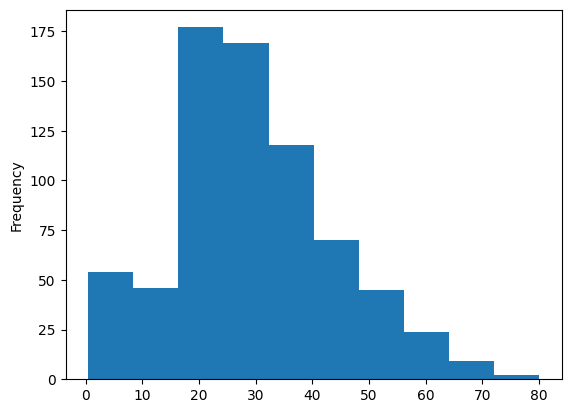

In [98]:
train['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

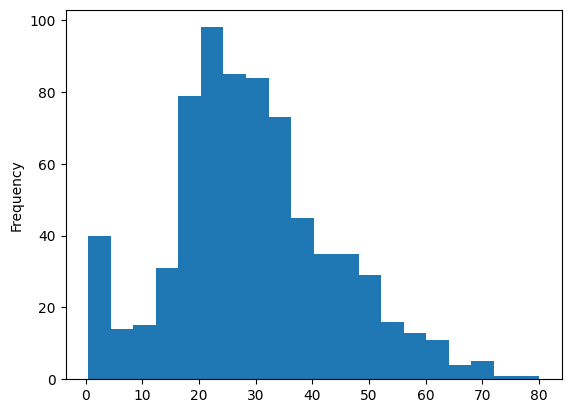

In [99]:
train['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

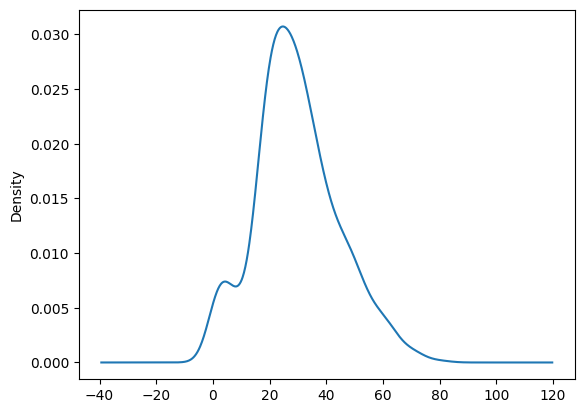

In [100]:
### kde plot
train['Age'].plot(kind='kde')

In [101]:
train['Age'].skew()

0.38910778230082704

In [102]:
## here it is near to 0 so it is likely Normally Distributed Data

<Axes: >

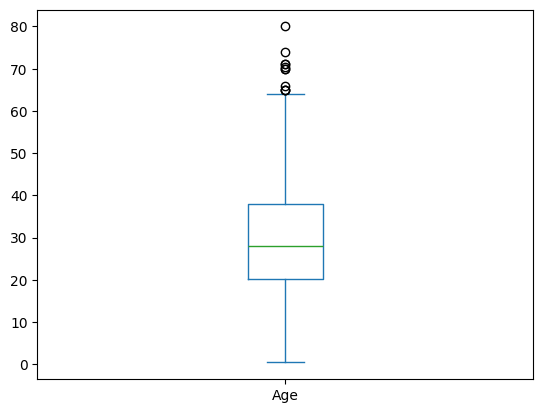

In [103]:
train['Age'].plot(kind='box')

In [104]:
train[train['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [105]:
train['Age'].isnull().sum()

177

In [106]:
train['Age'].isnull().sum()/len(train['Age'])

0.19865319865319866

In [107]:
## so here 0.19 means 19% values in Age column is null.

#### Age
**Conclusions**

- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

### Fare column

### Univariate Analysis on Numerical Columns - *Fare*

In [108]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Visualization

<Axes: ylabel='Frequency'>

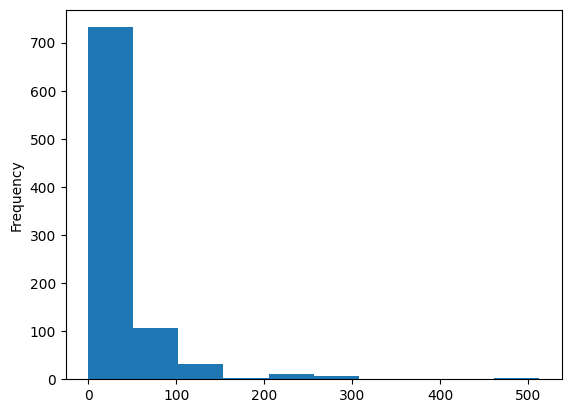

In [109]:
train['Fare'].plot(kind='hist')

In [110]:
### so here the data is not distributed

<Axes: ylabel='Density'>

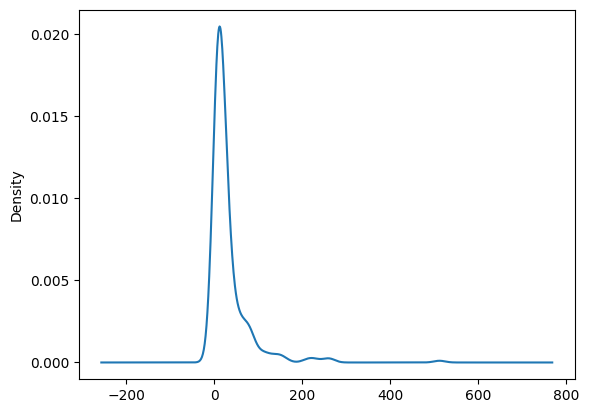

In [111]:
train['Fare'].plot(kind='kde')

In [112]:
train['Fare'].skew()

4.787316519674893

In [113]:
### it is highly possitive skewed

<Axes: >

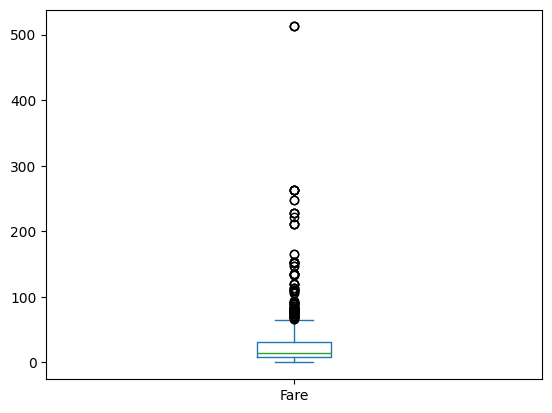

In [114]:
train['Fare'].plot(kind='box')

In [115]:
train[train['Fare'] > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [116]:
train[train['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [117]:
train['Fare'].isnull().sum()

0

#### Fare
**Conclusion**
- The data is highly (positive) skewed (right skewed)
- Fare col actually contains the group fare and not the individual fare (This might be an issue)

### Univariate Analysis on Categorical Columns 

### Survived

In [118]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

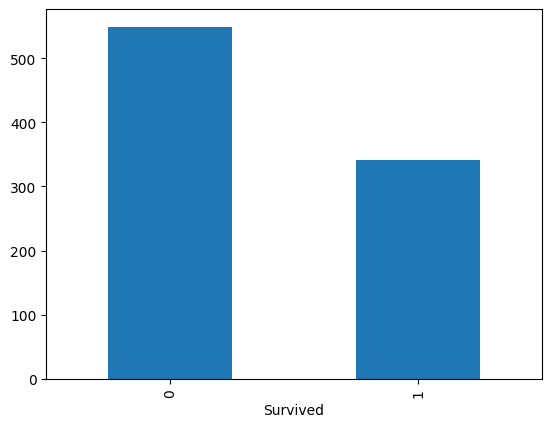

In [119]:
train['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

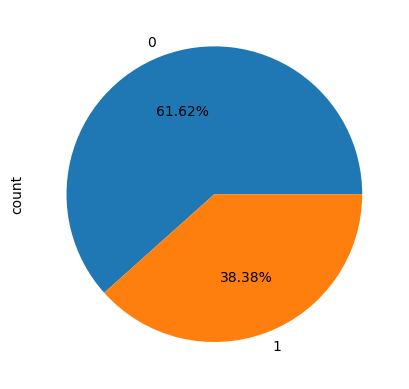

In [120]:
train['Survived'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [121]:
train['Survived'].isnull().sum()

0

#### Survived
**Conclusion**
- More than 60% (61.62%) people couldn't survived and only 38% people survived.
- There is no any missing values

### PClass

In [122]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

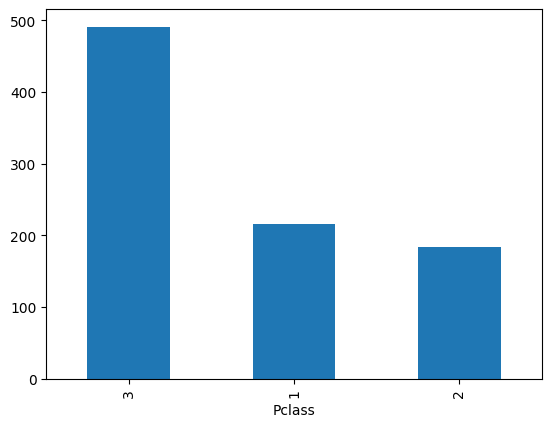

In [123]:
train['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

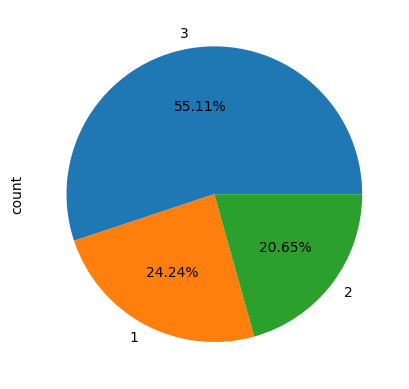

In [124]:
train['Pclass'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [125]:
train['Pclass'].isnull().sum()

0

#### Pclass
**Conclusion**
- There are 3 types of class 1(highest) and 3(lowest)
- 55% in class 3, 20% in class 2 and 24% in class 1.
- There is no any null value

### Sex

In [126]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

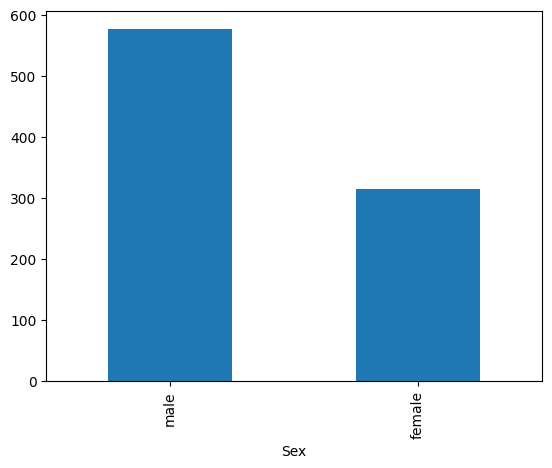

In [127]:
train['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

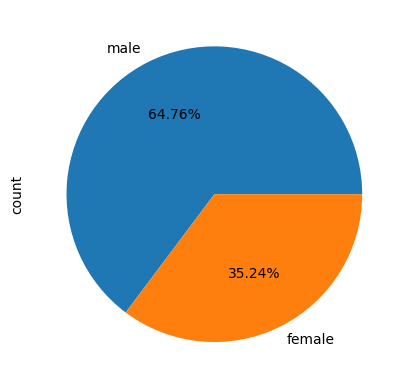

In [128]:
train['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [129]:
train['Sex'].isnull().sum()

0

#### Sex
**Conclusion**
- There are 64.76% of total are Male and 35% are Female.

### SibSp (Total persons traveling single, two, three etc)

In [130]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

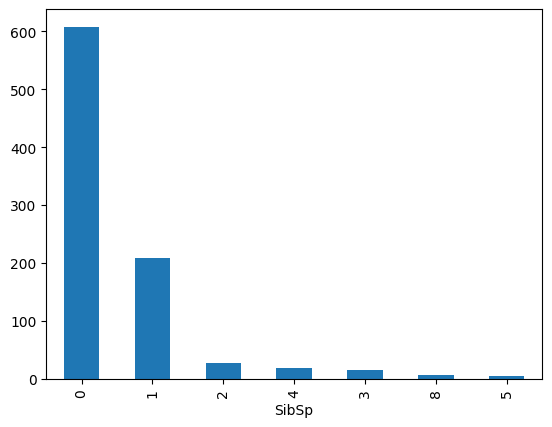

In [131]:
train['SibSp'].value_counts().plot(kind='bar')

In [132]:
train['SibSp'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

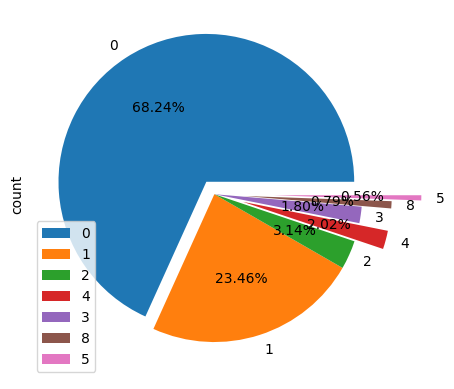

In [133]:
ex = [0.1,0,0,0.2,0,0.2,0.4]
labels = [0,1,2,4,3,8,5]
train['SibSp'].value_counts().plot(kind='pie', autopct='%.2f%%',explode=ex)
plt.legend(labels,loc='best')

In [134]:
train['SibSp'].isnull().sum()

0

#### SibSp
**Conclusion**
- Highest 68% of people are travelling single then with one (means total 2) 23% and with two(total 3) are 3.14% so on.

### Parch (is parent or child travelling)

In [135]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

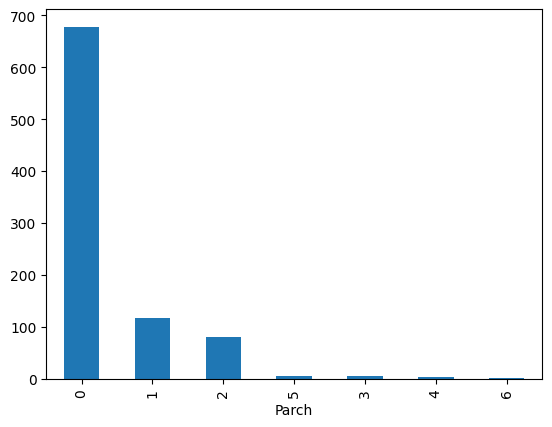

In [136]:
train['Parch'].value_counts().plot(kind='bar')

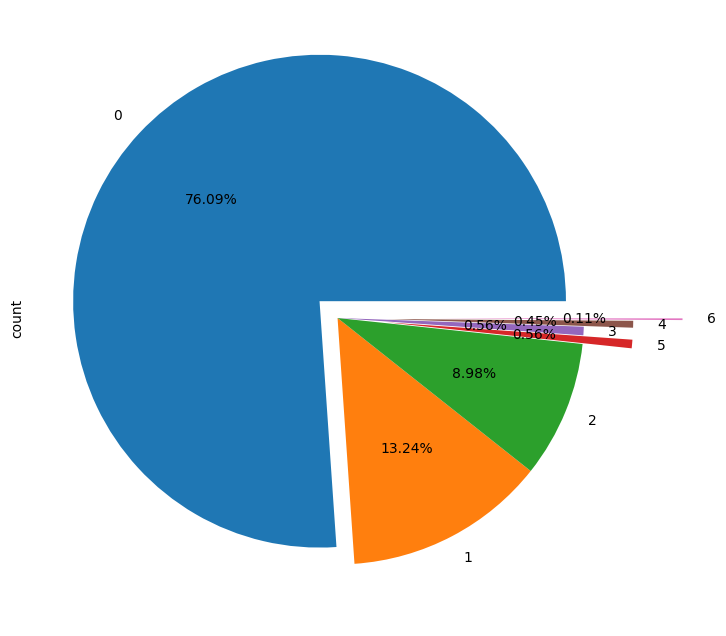

In [137]:
plt.figure(figsize=(8,8))
train['Parch'].value_counts().plot(kind='pie', autopct='%.2f%%',explode=ex)
plt.show()

In [138]:
train['Parch'].isnull().sum()

0

### Parch
**Conclusion**
- Maximum size of Parch is 6 (means max 6 people are travelling together total 7)
- Highest 76% of people are alone and Lowest 0.11% people are with 6
- Parch and SibSp cols can be merged together to form a new col called family_size
- Create a new col is_alone (to check is passenger is alone)

### Embarked

In [139]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

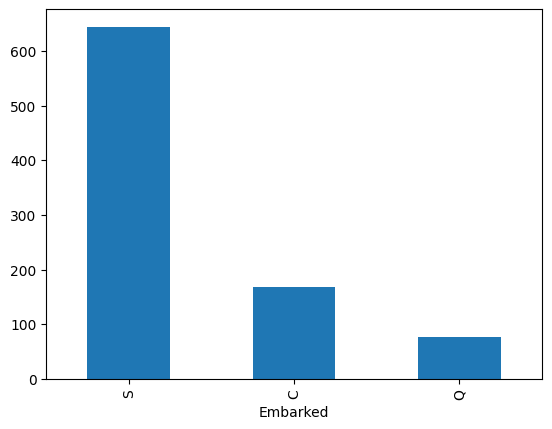

In [140]:
train['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

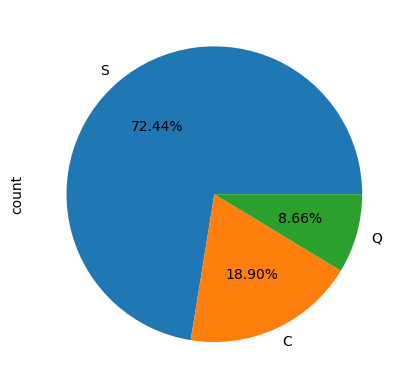

In [141]:
train['Embarked'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [142]:
train['Embarked'].isnull().sum()

2

#### Embarked
**Observation**
- Mostly (72%) are starting their journey from S and very less (8%) are starting from Q
- There are 2 missing values in this column

In [143]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [144]:
train['Embarked'].isnull().sum()

0

### Mixed Columns
- need to do feature engineering on mixed columns to get more insights.


### Bivariate Analysis for two column

In [145]:
pd.crosstab(train['Survived'],train['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [146]:
pd.crosstab(train['Survived'],train['Pclass'],normalize='columns')*100

### this is col-col

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


**Observation**
- Here the most dangerous class is 3 and most safe class is 1

<Axes: xlabel='Pclass', ylabel='Survived'>

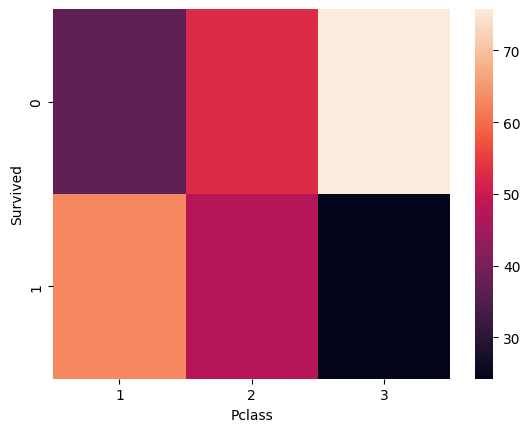

In [147]:
sns.heatmap(pd.crosstab(train['Survived'],train['Pclass'],normalize='columns')*100)

In [148]:
pd.crosstab(train['Survived'],train['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


**Observation**
- 74% of females survived and 81% of males died only 18% of males survived.

In [149]:
pd.crosstab(train['Survived'],train['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.099071
1,55.357143,38.961039,33.900929


In [150]:
pd.crosstab(train['Sex'],train['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.733746
male,56.547619,53.246753,68.266254


In [151]:
pd.crosstab(train['Pclass'],train['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.969040
2,10.119048,3.896104,25.386997
3,39.285714,93.506494,54.643963


**Observation**
- Here 50% of people are travelling in class 1 started form 'C' and that's why the highest % of survived in 'C'

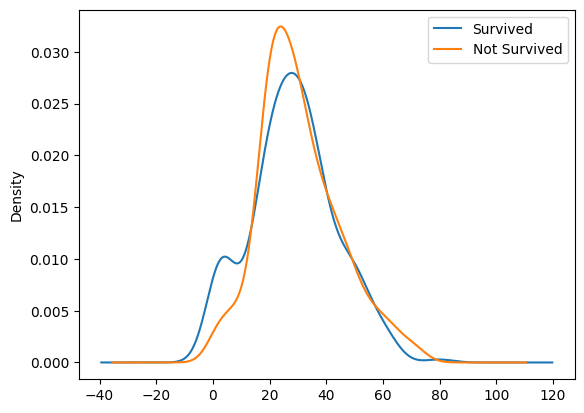

In [152]:
## survived and age
train[train['Survived']==1]['Age'].plot(kind='kde',label='Survived')
train[train['Survived']==0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

**Observation**
- The probability of Surviving for child (age between 0 to 10) is more than probability of Not Surviving and chance of surviving is less than chances of not surviving between age (11-35 or 40)

In [153]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

### Feature Engineering

In [154]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [155]:
## Feature Engineering on Fare Column

In [156]:
train['SibSp'].value_counts() ## SibSp -> Sibling Spouse

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [157]:
train[train['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**Observation**
- Here the 'Sage' is present in everyone's name so they are from same family and their ticket is also same.

In [158]:
train[train['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [159]:
train[train['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [160]:
## test data
test = pd.read_csv('test.csv')

In [161]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [162]:
## combines df
df = pd.concat([train,test])

In [163]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [164]:
### checking for ticket *CA. 2343*
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [165]:
df[df['Ticket']=='CA. 2343'].shape

(11, 12)

In [166]:
## so 7 rows are in train and other are in test

In [167]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [168]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

In [169]:
df['individual_fare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: individual_fare, Length: 1309, dtype: float64

In [170]:
df['individual_fare'].describe()

count    1308.000000
mean       20.518215
std        35.774337
min         0.000000
25%         7.452767
50%         8.512483
75%        24.237500
max       512.329200
Name: individual_fare, dtype: float64

<Axes: >

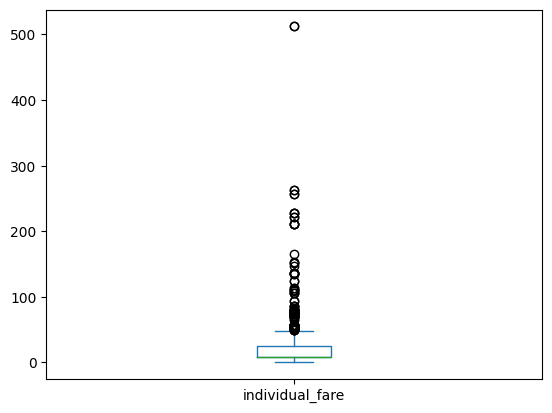

In [171]:
df['individual_fare'].plot(kind='box')

In [172]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [173]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [174]:
df['family_size']

0      2
1      2
2      1
3      2
4      1
      ..
413    1
414    1
415    1
416    1
417    3
Name: family_size, Length: 1309, dtype: int64

In [175]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1


In [176]:
### creating a new feature -> 'family type'

## family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):
    if num ==1:
        return 'alone'
    elif num>1 and num<5:
        return 'small'
    else:
        return 'large'

In [177]:
df['family_type'] = df['family_size'].map(transform_family_size)

In [178]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [179]:
## Bivariate Analysis on Family type column
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')

family_type,alone,large,small
Survived,,,
0.0,0.696462,0.83871,0.421233
1.0,0.303538,0.16129,0.578767


**Observation**
- If family type is small then the changes of surviving is high.

In [180]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [181]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware


In [182]:
df['title'] = df['Name'].str.split(',').str.get(1).str.split(' ').str.get(1)

In [183]:
df['title'].value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [184]:
df['title'] = df['title'].replace('Mlle.','Miss.')
df['title'] = df['title'].replace('Ms.','Miss.')
df['title'] = df['title'].replace('Mme.','Miss.')
df['title'] = df['title'].replace('Lady.','Miss.')
df['title'] = df['title'].replace('Dona.','Mrs.')

df['title'] = df['title'].replace('Sir.','Mr.')

df['title'] = df['title'].replace('Rev.','Other')
df['title'] = df['title'].replace('Col.','Other')
df['title'] = df['title'].replace('Major.','Other')
df['title'] = df['title'].replace('Don.','Other')
df['title'] = df['title'].replace('Capt.','Other')
df['title'] = df['title'].replace('the','Other')
df['title'] = df['title'].replace('Jonkheer.','Other')
df['title'] = df['title'].replace('Dr.','Other')

In [185]:
df['title'].value_counts()

title
Mr.        758
Miss.      266
Mrs.       198
Master.     61
Other       26
Name: count, dtype: int64

so here there are only 5 categories

In [186]:
df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','other'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector,Mr.
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana,Mrs.
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether,Mr.
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware,Mr.


In [187]:
temp_df = df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','other'])]

In [188]:
pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0.0,42.5,29.411765,84.169884,20.8
1.0,57.5,70.588235,15.830116,79.2


**Observation**
- If title is Mrs. then chances of surviving is highest (79%)
- and If title is Miss. then chances of surviving is also high (70%)
- and if the title is Mr. then the chances of surviving is very low (15%)

In [189]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [190]:
df['Cabin'].isnull().sum()

1014

In [191]:
df['Cabin'].isnull().sum()/len(df['Cabin'])
## so here 77% of values are missing

0.774637127578304

In [192]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [193]:
## filling all the missing values with 'M'
df['Cabin'].fillna('M',inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7348\1775192303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M',inplace=True)


In [194]:
df['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [195]:
df['Cabin'].str[0] ## first letter represent the deck 

0      M
1      C
2      M
3      C
4      M
      ..
413    M
414    C
415    M
416    M
417    M
Name: Cabin, Length: 1309, dtype: object

In [196]:
df['deck'] = df['Cabin'].str[0]

In [197]:
df['deck'].value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [198]:
## relation between surviving and deck
pd.crosstab(df['Survived'],df['deck'],normalize='columns')*100

deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


**Observation**
- if the passanges cabin is in 'D' or in 'E' deck then chances of surviving is highest (75%) and (61%) for F and (0%) definitely not surviving if the cabin is in deck 'T'

In [199]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

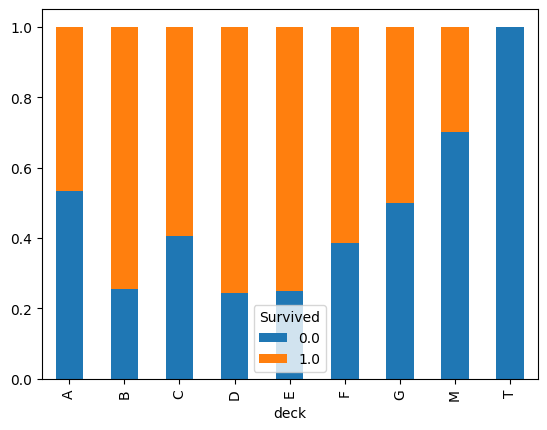

In [200]:
## relation between surviving and deck
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

In [201]:
num_col_list = [feature for feature in df.columns if df[feature].dtype!='O']

In [202]:
num_col_list

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'individual_fare',
 'family_size']

In [203]:
df[num_col_list].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,individual_fare,family_size
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.035365,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.221600,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.504270,0.050027
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.193545,-0.240229
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.089807,0.861952
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.065498,0.792296
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.832029,0.226492
individual_fare,0.035365,0.221600,-0.504270,0.193545,-0.089807,-0.065498,0.832029,1.000000,-0.094874
family_size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.094874,1.000000


In [204]:
df[num_col_list].corr()['Survived']

PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
individual_fare    0.221600
family_size        0.016639
Name: Survived, dtype: float64

- Here Survived is highly negatively correlated with Age it means higher the age is and chances of Surviving is low.

<Axes: >

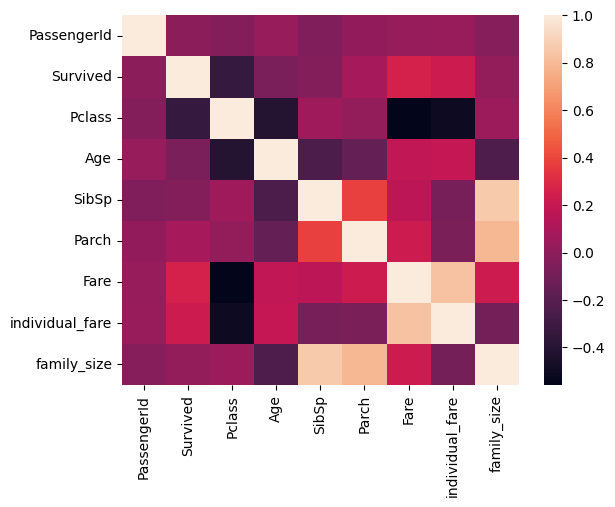

In [205]:
sns.heatmap(df[num_col_list].corr())

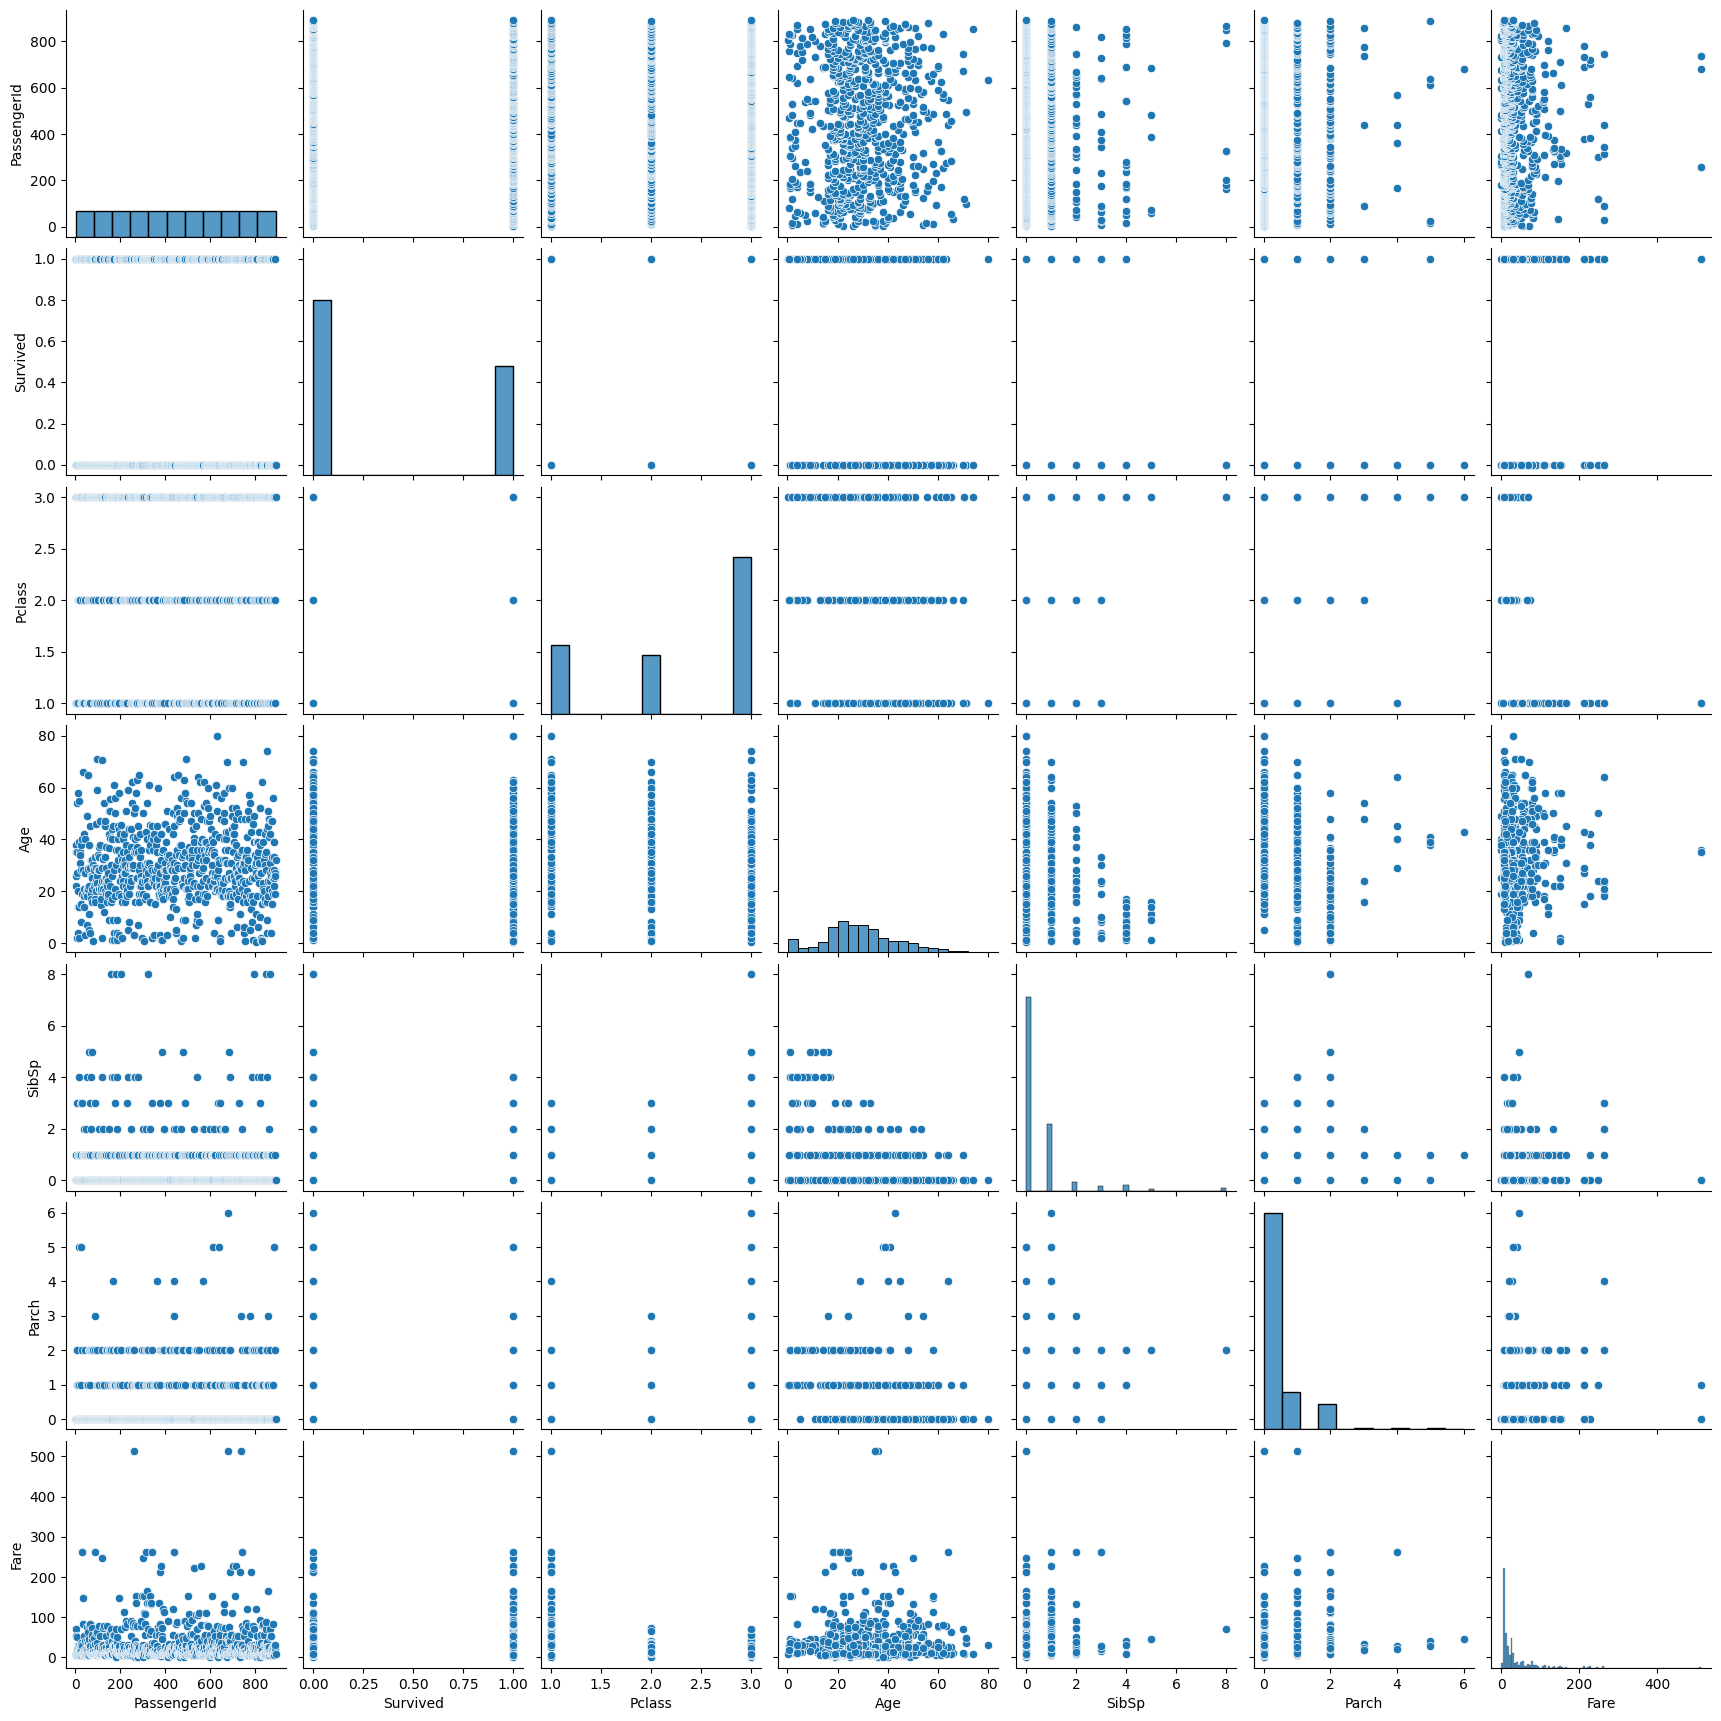

In [206]:
sns.pairplot(train)